In [3]:
!pip install pySURF
!pip install wget

  Using cached https://files.pythonhosted.org/packages/96/fa/6f0c6872f6d7fd66100e5d2cb0183f5b38a10348da8e552de1e76b927a88/pySURF-0.2.4.4.2.tar.gz
    100% |████████████████████████████████| 921kB 6.4MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/80/d6/4294f0b4bce4de0abf13e17190289f9d0613b0a44e5dd6a7f5ca98459853/selenium-3.141.0-py2.py3-none-any.whl
  Could not find a version that satisfies the requirement tensorflow==1.12.0 (from pySURF) (from versions: 1.13.0rc1, 1.13.0rc2, 1.13.1, 1.13.2, 1.14.0rc0, 1.14.0rc1, 1.14.0, 1.15.0rc0, 1.15.0rc1, 1.15.0rc2, 1.15.0rc3, 1.15.0, 1.15.2, 2.0.0a0, 2.0.0b0, 2.0.0b1, 2.0.0rc0, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.1.0rc0, 2.1.0rc1, 2.1.0rc2, 2.1.0)
No matching distribution found for tensorflow==1.12.0 (from pySURF)


In [ ]:
# import libs
import os
import wget
import zipfile
import shutil  
import csv
import numpy as np

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

Beginning file download with wget module

File downloaded. 



/Users/simcenter/Codes/SimCenter/SURF/examples/venv3.6.6_pySURF/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/simcenter/Codes/SimCenter/SURF/examples/venv3.6.6_pySURF/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/simcenter/Codes/SimCenter/SURF/examples/venv3.6.6_pySURF/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 26,625
Trainable params: 26,625
Non-trainable params: 0
_________________________________________________________________
[1981. 1995. 1983. ... 1973. 1982. 1993.]
0
.....................................

     val_loss  val_mean_absolute_error  val_mean_square

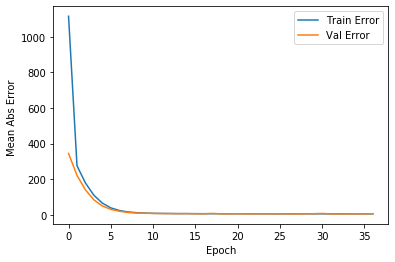

Testing set Mean Abs Error:  5.74 
[1983. 1976. 1960. ... 1977. 1978. 1974.]
[1983.4645 1983.2046 1980.4591 ... 2007.309  1980.8568 1980.744 ]
errors:  
[ 0.46447754  7.20458984 20.45910645 ... 30.30895996  2.85681152
  6.74401855]


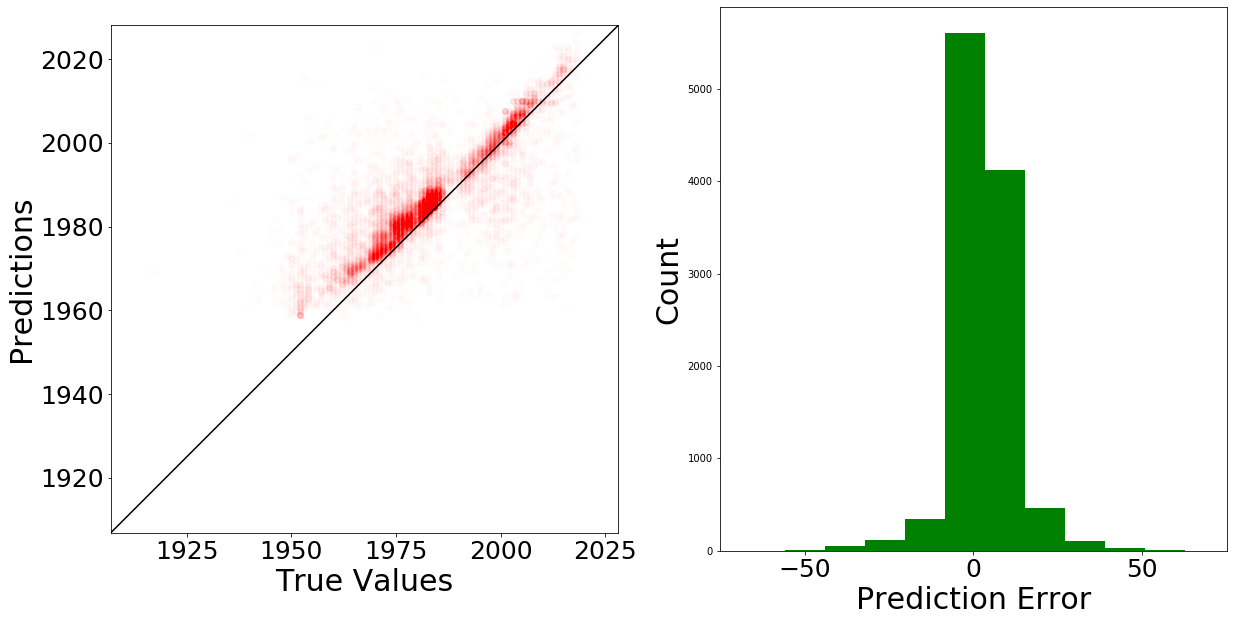

In [1]:
#---------------------------------------------------------------------------------------
# 0. Download data
#---------------------------------------------------------------------------------------

url = 'https://berkeley.box.com/shared/static/jbvyu0ng0zrt75il3ps1qygwellpr8c5.zip'
workDir = 'tmp'
fileName = 'AnchorageBuildings.zip'
print('Beginning file download with wget module')
wget.download(url, fileName)
print('\nFile downloaded. \n')

with zipfile.ZipFile(fileName, 'r') as zip_ref:
    zip_ref.extractall('tmp')

try:
    dest = shutil.move(fileName, workDir+'/') 
except:
    os.remove(workDir+'/'+fileName)
    dest = shutil.move(fileName, workDir+'/') 



In [ ]:

#---------------------------------------------------------------------------------------
# 1. Prepare data
#---------------------------------------------------------------------------------------

BIMFileName = 'tmp/AnchorageBuildings.csv'

# read raw data
data = []
with open(BIMFileName, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        lat = float(row['Latitude'])
        lon = float(row['Longitude'])
        yearbuilt = int(float(row['Year Built']) )
        if lat>61.05 and lat<61.2 and lon>-150. and lon<-149.7:
            data.append([lon, lat, yearbuilt])

# data is a numpy matrix with columns: [x,y,value]
data = np.array(data)



In [ ]:
#---------------------------------------------------------------------------------------
# 2. Train a neural network
#---------------------------------------------------------------------------------------
from surf.NN import SpatialNeuralNet


# define a spatial neural network
# numNei is the number of nearest neighbors to be considered
# writeTmpData is true so that temporary files are written down in ./tmp
nn = SpatialNeuralNet(rawData = data, numNei = 2, writeTmpData=True)
nn.build_model()
nn.train()



In [ ]:
#---------------------------------------------------------------------------------------
# 3. Test the neural network
#---------------------------------------------------------------------------------------

nn.test()